In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.transforms import Compose, PILToTensor, ToTensor
import PIL
import torch
import torchvision as torchvision

from dataset import CropSegmentationDataset
from am4ip.new_trainer import BaselineTrainer

from torch.utils.data import DataLoader

In [2]:
batch_size = 6
lr = 1e-2
epoch = 1

In [3]:
transform = Compose([lambda z: z.resize((256,256),PIL.Image.BILINEAR), 
                     PILToTensor(),
                     lambda z: z.to(dtype=torch.float32) / 127.5 - 1  # Normalize between -1 and 1
                     ])

target_transform = Compose([lambda z: z.resize((256,256),PIL.Image.NEAREST),
                            PILToTensor(),
                            lambda z : z.to(dtype=torch.int64).squeeze(0)
                     ])

In [4]:
dataset_train = CropSegmentationDataset(set_type="train", transform=transform, target_transform = target_transform, remove_small_items = True, merge_small_items=False)
dataset_val = CropSegmentationDataset(set_type="val", target_transform = target_transform, transform = transform, remove_small_items = True, merge_small_items=False)

In [5]:
new_data_img = np.array([12,213,6564])
print(new_data_img.squeeze().shape)

print(dataset_val.labels.shape)
print(dataset_val[2][0])

(3,)
(422,)
tensor([[[ 0.2784,  0.1137,  0.2471,  ...,  0.1059, -0.4902,  0.1922],
         [ 0.1529, -0.0431,  0.0196,  ..., -0.2627, -0.5294,  0.2392],
         [ 0.2235,  0.1843,  0.1765,  ..., -0.0431, -0.0745, -0.1294],
         ...,
         [ 0.2549,  0.3098,  0.2627,  ...,  0.1686, -0.2078, -0.0039],
         [ 0.3569,  0.3412,  0.1608,  ..., -0.4431, -0.1294, -0.0980],
         [ 0.2549,  0.3412,  0.0275,  ..., -0.7804, -0.2863,  0.0667]],

        [[-0.0510, -0.1922, -0.0667,  ..., -0.1216, -0.6471, -0.1373],
         [-0.1686, -0.3176, -0.2627,  ..., -0.4275, -0.6784, -0.0824],
         [-0.1137, -0.1137, -0.1137,  ..., -0.2784, -0.3098, -0.4039],
         ...,
         [-0.0745, -0.0196, -0.0745,  ..., -0.1059, -0.4275, -0.2784],
         [ 0.0196,  0.0039, -0.1686,  ..., -0.5765, -0.3804, -0.3255],
         [-0.0667,  0.0039, -0.2706,  ..., -0.8510, -0.4745, -0.1686]],

        [[-0.3412, -0.4588, -0.3647,  ..., -0.3412, -0.7490, -0.3961],
         [-0.4431, -0.5529, -0.51

In [6]:
type(dataset_val.labels)

numpy.ndarray

In [7]:
t0 = dataset_val[0]

In [8]:
print(type(dataset_train))
print(type(dataset_train[0]))

<class 'dataset.CropSegmentationDataset'>
<class 'tuple'>


In [9]:
t1 = dataset_train[620]

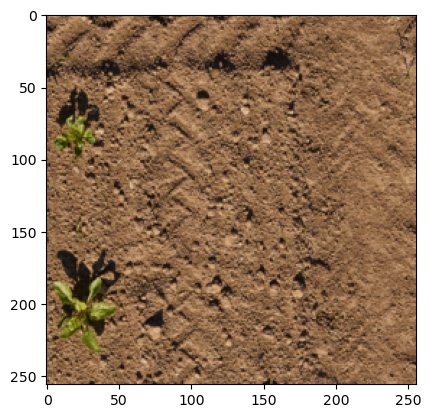

In [10]:
plt.imshow((t0[0].permute(1,2,0)+1) * 0.5)

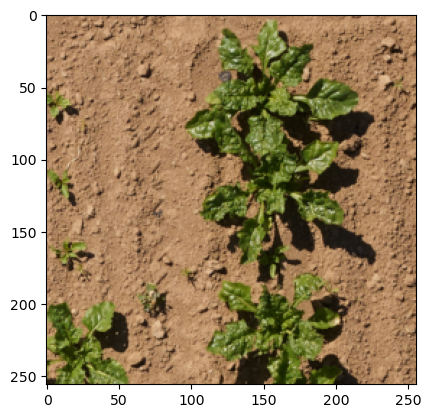

In [11]:
plt.imshow((t1[0].permute(1,2,0)+1) * 0.5)

In [12]:
print(t1[0])

tensor([[[ 0.5294,  0.4275,  0.2784,  ...,  0.5373,  0.5216,  0.5608],
         [ 0.4510,  0.4039,  0.5059,  ...,  0.4196,  0.4667,  0.5294],
         [ 0.4275,  0.2784,  0.4118,  ...,  0.5059,  0.3725,  0.5451],
         ...,
         [-0.6784, -0.6863, -0.6706,  ..., -0.0745,  0.3255,  0.3020],
         [-0.6706, -0.7255, -0.7176,  ...,  0.2314,  0.4824,  0.2471],
         [-0.6784, -0.7333, -0.7255,  ...,  0.3412,  0.3647,  0.4510]],

        [[ 0.2392,  0.0980, -0.0431,  ...,  0.2157,  0.1843,  0.2314],
         [ 0.1216,  0.0824,  0.2078,  ...,  0.0824,  0.1373,  0.2000],
         [ 0.0902, -0.0510,  0.0980,  ...,  0.1608,  0.0510,  0.2157],
         ...,
         [-0.7412, -0.7490, -0.7490,  ..., -0.3333,  0.0118, -0.0118],
         [-0.7333, -0.7882, -0.7804,  ..., -0.0745,  0.1608, -0.0510],
         [-0.7333, -0.7882, -0.7804,  ...,  0.0196,  0.0510,  0.1451]],

        [[-0.0588, -0.1765, -0.3020,  ..., -0.1059, -0.1373, -0.0902],
         [-0.1686, -0.2000, -0.0980,  ..., -0

In [13]:
print(t1[1])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [14]:
t1_1array = np.array(t1[1]).squeeze()

print(np.max(t1_1array))

2


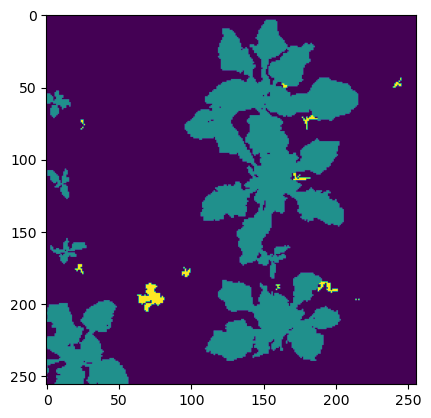

In [15]:
plt.imshow(t1_1array)

In [16]:
def target_pixel(img):
    img = np.array(img).squeeze()
    
    print(img.shape)
    

target_pixel(t1[1])

(256, 256)


In [17]:
def create_model(n):
    encoder = torch.nn.Sequential(
        torch.nn.Conv2d(3,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3)),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3)),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.MaxPool2d((2,2),2),
        
        torch.nn.Conv2d(64,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3)),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
    
        torch.nn.MaxPool2d((2,2),2),
    
        torch.nn.Conv2d(128,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3)),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU()
    )

    reconstruction = torch.nn.Sequential(
        torch.nn.Conv2d(3,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.MaxPool2d((2,2),2),
        
        torch.nn.Conv2d(64,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.MaxPool2d((2,2),2),
    
        torch.nn.Conv2d(128,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(256,256,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(),
        
        torch.nn.Upsample(scale_factor=2),
        
        torch.nn.Conv2d(256,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(128,128,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        
        torch.nn.Upsample(scale_factor=2),
        
        torch.nn.Conv2d(128,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,64,(3,3), padding = 'same'),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        
        torch.nn.Conv2d(64,n,(3,3), padding = 'same'),
    )

    return encoder, reconstruction

In [18]:
encoder, reconstruction = create_model(3)

In [19]:
model = reconstruction

In [20]:
loss = torch.nn.CrossEntropyLoss()

In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [22]:
trainer = BaselineTrainer(model=model, loss = loss, optimizer=optimizer)

In [23]:
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size)

In [24]:
model = torch.load("recon15epoch.pt")
trainer = BaselineTrainer(model=model, loss = loss, optimizer=optimizer)

In [25]:
hist = trainer.fit(train_loader, val_loader, epoch=epoch)

Start epoch 1/1


Validation 71/71: loss = 0.015443308036249707


In [26]:
print(hist)

{'train_loss': [0.03793074240155043], 'train_accuracy': [64552.3724235963], 'val_loss': [0.015443308036249707], 'val_accuracy': [0.9938913499009553]}


Keys in hist: dict_keys(['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy'])


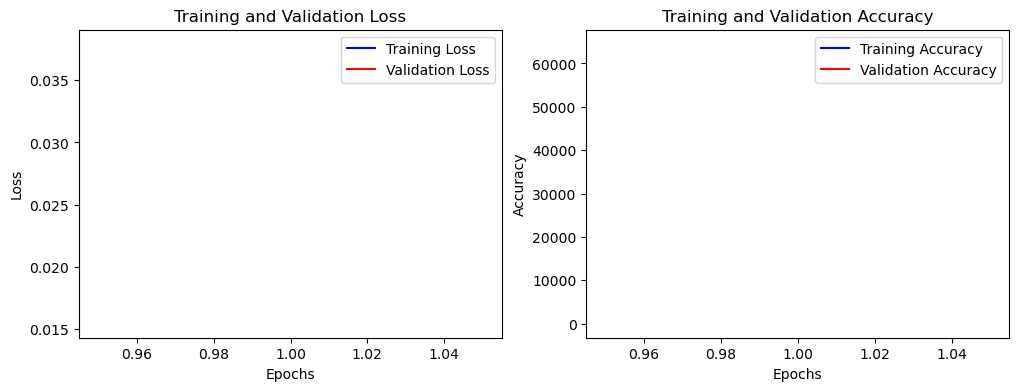

In [27]:
print("Keys in hist:", hist.keys())

# Extraction des informations sur la perte et la précision
train_loss = hist['train_loss']
val_loss = hist['val_loss']
train_accuracy = hist['train_accuracy']
val_accuracy = hist['val_accuracy']

# Tracé des courbes d'apprentissage
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
#torch.save(model, 'recon15epoch.pt')

In [29]:
len(dataset_train)

1407

In [30]:
t0 = dataset_val[16]

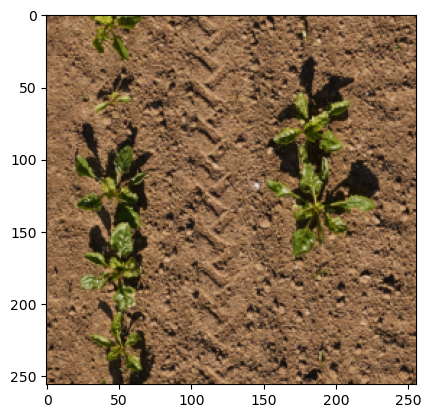

In [31]:
i_drone = (t0[0].permute(1,2,0)+1) * 0.5
plt.imshow(i_drone)

In [32]:
test = trainer.model.forward(t0[0].unsqueeze(0).cuda())

In [33]:
test.size()

torch.Size([1, 3, 256, 256])

In [34]:
test = test.cpu().detach()
test1 = test.squeeze(0)
i = torch.softmax(test1, 0)

In [35]:
print(i[:, 120, 120])

tensor([1.0000e+00, 5.9869e-07, 5.4075e-08])


In [36]:
print(np.sum(i[:, 120, 120].numpy()))

print(len(i))

1.0
3


In [37]:
i_merged = torch.stack([i[0], i[1], i[2]])
i_result = torch.argmax(i_merged, dim=0)

print(type(i[0]))
print(type(i[1]))
print(type(i[2]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


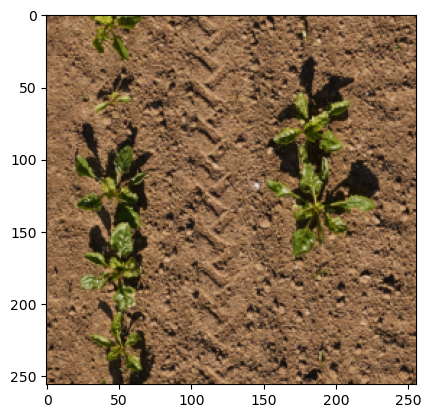

In [38]:
plt.imshow(i_drone)

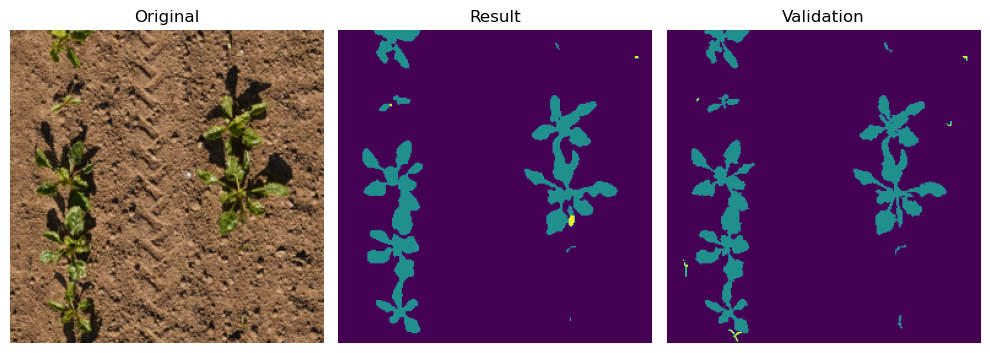

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  

axes[0].imshow(i_drone)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(i_result)
axes[1].set_title('Result')
axes[1].axis('off')
axes[2].imshow(np.array(t0[1]).squeeze())
axes[2].set_title('Validation')
axes[2].axis('off')

plt.tight_layout()

plt.show()

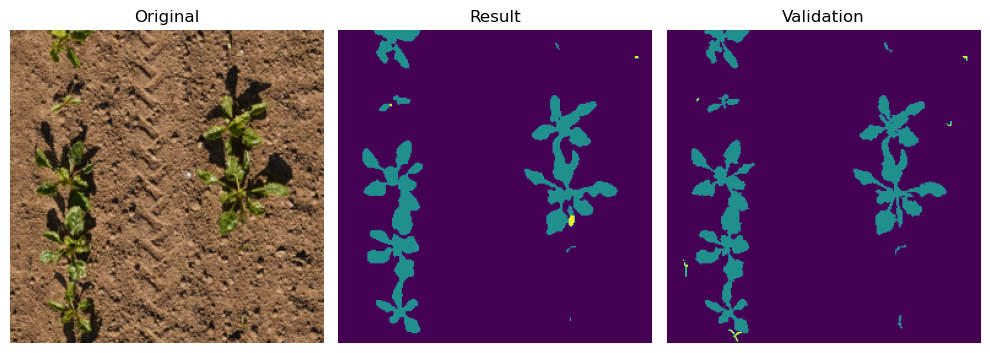

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  

axes[0].imshow(i_drone)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(i_result)
axes[1].set_title('Result')
axes[1].axis('off')
axes[2].imshow(np.array(t0[1]).squeeze())
axes[2].set_title('Validation')
axes[2].axis('off')

plt.tight_layout()

plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve